In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import re
import requests
from bs4 import BeautifulSoup as bs
import json
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud

import acquire as ac
import prepare as pr
import wrangle as wr

# Acquiring Data:

In [2]:
X_train, y_train, X_validate, y_validate, X_test, y_test, df, df_languages = wr.cat_wrangle()

Removed 60 rows with empty Readmes.
Removed 187 rows with Readmes < 10 words long.
Train = 421 rows (56.0%) | Validate = 181 rows (24.0%) | Test = 151 rows (20.0%)


In [3]:
train, validate, test = wr.splitter(df)

Train = 421 rows (56.0%) | Validate = 181 rows (24.0%) | Test = 151 rows (20.0%)
You did not stratify.  If looking to stratify, ensure to add argument: "target = variable to stratify on".


In [4]:
train.head()

,repo,cleaned,cleaned_length,language_group
495,barnybug/s3,army penknife amazon list bucket get download ...,68,Other
931,lyzidiamond/catnews,cat generated code america created bunch 2014 ...,141,Other
768,teteusAraujo/KdMeuBichinho,meu bichinho plataforna ainda encontra fase co...,143,JavaScript
833,adafruit/CatLaser2,raspberry cat laser pointer toy code repositor...,21,Python
348,frees-io/iota,comment start maven latest github end tiny lib...,195,Scala


# Preparing Data:

## Cleaning the original DataFrame: 
- Creates rows for repo name, top language, the contents of the readme, and the cleaned text of the readmes:
    - Removes newlines, urls, and words that are longer than 14 characters.
    - Makes it all lowercase, tokenizes the words, and then lemmatizes (or stems) them.

#### Removing any records that are fewer than 11 words (leaves 743 records left):

# Exploration
- My focus is on bigrams and word visualizations.

In [5]:
train.language_group.value_counts()

Other         210
Scala          77
Python         71
JavaScript     63
Name: language_group, dtype: int64

## Creating WordClouds:

### Python:

#### Creating separate DataFrame of Python-lead READMEs:

In [6]:
python_df = train[train.language_group == 'Python']

In [7]:
python_df.head(2)

,repo,cleaned,cleaned_length,language_group
833,adafruit/CatLaser2,raspberry cat laser pointer toy code repositor...,21,Python
253,mdcg/http-cats-telegram-bot,http cat telegram simple chatbot telegram http...,82,Python


#### Joining all the text from Python READMEs into a single group:

In [8]:
python_text = ''
for i in range(python_df.shape[0]):
    python_text = python_text + python_df.cleaned.iloc[i]
    
python_text[0:200]

'raspberry cat laser pointer toy code repository work progress cat laser toy video series video series part part part part parthttp cat telegram simple chatbot telegram http cat project created intenti'

#### Creating a WordCloud from all of the Python text:

(-0.5, 399.5, 199.5, -0.5)

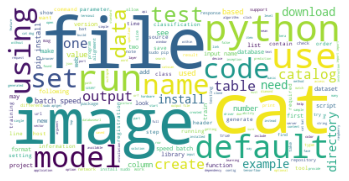

In [9]:
img = WordCloud(background_color='white').generate(python_text)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')

#### Creating bigrams from the text:

In [32]:
bigrams = nltk.ngrams(python_text.split(), 2)
list(bigrams)

[('raspberry', 'cat'),
 ('cat', 'laser'),
 ('laser', 'pointer'),
 ('pointer', 'toy'),
 ('toy', 'code'),
 ('code', 'repository'),
 ('repository', 'work'),
 ('work', 'progress'),
 ('progress', 'cat'),
 ('cat', 'laser'),
 ('laser', 'toy'),
 ('toy', 'video'),
 ('video', 'series'),
 ('series', 'video'),
 ('video', 'series'),
 ('series', 'part'),
 ('part', 'part'),
 ('part', 'part'),
 ('part', 'part'),
 ('part', 'parthttp'),
 ('parthttp', 'cat'),
 ('cat', 'telegram'),
 ('telegram', 'simple'),
 ('simple', 'chatbot'),
 ('chatbot', 'telegram'),
 ('telegram', 'http'),
 ('http', 'cat'),
 ('cat', 'project'),
 ('project', 'created'),
 ('created', 'intention'),
 ('intention', 'helping'),
 ('helping', 'developer'),
 ('developer', 'create'),
 ('create', 'first'),
 ('first', 'chatbots'),
 ('chatbots', 'telegram'),
 ('telegram', 'find'),
 ('find', 'tutorial'),
 ('tutorial', 'creation'),
 ('creation', 'chatbot'),
 ('chatbot', 'visiting'),
 ('visiting', 'following'),
 ('following', 'link'),
 ('link', 'htt

In [34]:
top_20_python_bigrams = (pd.Series(nltk.ngrams(python_text.split(), 2))
                      .value_counts()
                      .head(20))

top_20_python_bigrams.head()

(&#9;, speed)     36
(pip, install)    34
(input, name)     32
(speed, 267)      22
(267, batch)      20
dtype: int64

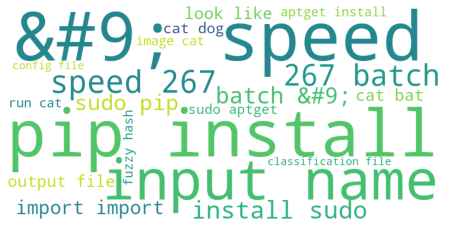

In [47]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_python_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

Given that these bigrams seem to be single letters, mostly nonsensical, it may be worth adding a condition to the cleaning function that eliminates words that are only single letters (although it's worth noting that this could eliminate things like "I" or "a."

### Scala:

In [12]:
scala_df = train[train.language_group == 'Scala']

In [13]:
scala_text = ''
for i in range(scala_df.shape[0]):
    scala_text = scala_text + scala_df.cleaned.iloc[i]
    
scala_text[0:200]

'comment start maven latest github end tiny library fast coproduct type cleanly support disjunction number coproduct implemented binary linked list type value level syntax coproducts frequently becomes'

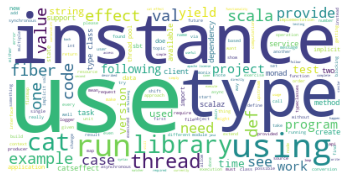

In [14]:
img = WordCloud(background_color='white').generate(scala_text)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off');

In [15]:
scala_bigrams = nltk.ngrams(scala_text.split(), 2)
list(scala_bigrams)

[('comment', 'start'),
 ('start', 'maven'),
 ('maven', 'latest'),
 ('latest', 'github'),
 ('github', 'end'),
 ('end', 'tiny'),
 ('tiny', 'library'),
 ('library', 'fast'),
 ('fast', 'coproduct'),
 ('coproduct', 'type'),
 ('type', 'cleanly'),
 ('cleanly', 'support'),
 ('support', 'disjunction'),
 ('disjunction', 'number'),
 ('number', 'coproduct'),
 ('coproduct', 'implemented'),
 ('implemented', 'binary'),
 ('binary', 'linked'),
 ('linked', 'list'),
 ('list', 'type'),
 ('type', 'value'),
 ('value', 'level'),
 ('level', 'syntax'),
 ('syntax', 'coproducts'),
 ('coproducts', 'frequently'),
 ('frequently', 'becomes'),
 ('becomes', 'unwieldy'),
 ('unwieldy', 'number'),
 ('number', 'type'),
 ('type', 'coproduct'),
 ('coproduct', 'type'),
 ('type', 'using'),
 ('using', 'eitherfoo'),
 ('eitherfoo', 'eitherint'),
 ('eitherint', 'eitherstring'),
 ('eitherstring', 'coproduct'),
 ('coproduct', 'type'),
 ('type', 'constructor'),
 ('constructor', 'using'),
 ('using', 'eitherkbar0a'),
 ('eitherkbar0a',

In [30]:
top_20_scala_bigrams = (pd.Series(nltk.ngrams(scala_text.split(), 2))
                      .value_counts()
                      .head(20))

top_20_scala_bigrams.head()

(type, class)        52
(thread, pool)       41
(implicit, val)      21
(cat, effect)        19
(apache, license)    18
dtype: int64

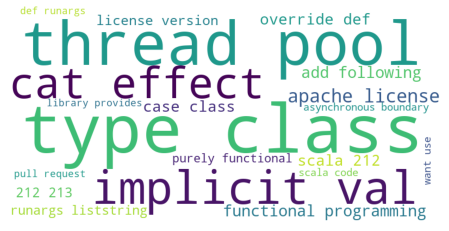

In [48]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_scala_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

## JavaScript:

In [41]:
js_df = train[train.language_group == 'JavaScript']

In [42]:
js_text = ''
for i in range(js_df.shape[0]):
    js_text = js_text + js_df.cleaned.iloc[i]
    
js_text[0:200]

'meu bichinho plataforna ainda encontra fase construcao sobre kdmeubichinho projeto surgiu com missao ajudar pessoas que querem encontrar seu melhor amigo dog cat rabbit que foi perdido encontrar algue'

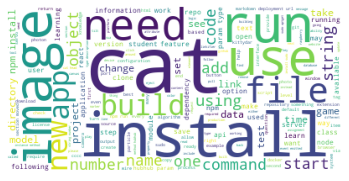

In [43]:
img = WordCloud(background_color='white').generate(js_text)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off');

In [44]:
js_bigrams = nltk.ngrams(js_text.split(), 2)
list(js_bigrams)

[('meu', 'bichinho'),
 ('bichinho', 'plataforna'),
 ('plataforna', 'ainda'),
 ('ainda', 'encontra'),
 ('encontra', 'fase'),
 ('fase', 'construcao'),
 ('construcao', 'sobre'),
 ('sobre', 'kdmeubichinho'),
 ('kdmeubichinho', 'projeto'),
 ('projeto', 'surgiu'),
 ('surgiu', 'com'),
 ('com', 'missao'),
 ('missao', 'ajudar'),
 ('ajudar', 'pessoas'),
 ('pessoas', 'que'),
 ('que', 'querem'),
 ('querem', 'encontrar'),
 ('encontrar', 'seu'),
 ('seu', 'melhor'),
 ('melhor', 'amigo'),
 ('amigo', 'dog'),
 ('dog', 'cat'),
 ('cat', 'rabbit'),
 ('rabbit', 'que'),
 ('que', 'foi'),
 ('foi', 'perdido'),
 ('perdido', 'encontrar'),
 ('encontrar', 'alguem'),
 ('alguem', 'que'),
 ('que', 'esta'),
 ('esta', 'bulb'),
 ('bulb', 'ideia'),
 ('ideia', 'conexao'),
 ('conexao', 'entre'),
 ('entre', 'interesses'),
 ('interesses', 'comuns'),
 ('comuns', 'pessoas'),
 ('pessoas', 'animais'),
 ('animais', 'atraves'),
 ('atraves', 'suas'),
 ('suas', 'pessoas'),
 ('pessoas', 'que'),
 ('que', 'perderam'),
 ('perderam', 'seu

In [49]:
top_20_js_bigrams = (pd.Series(nltk.ngrams(js_text.split(), 2))
                      .value_counts()
                      .head(20))

top_20_js_bigrams.head()

(npm, install)        22
(param, type)         18
(hubhub, param)       14
(npm, run)            12
(install, install)    10
dtype: int64

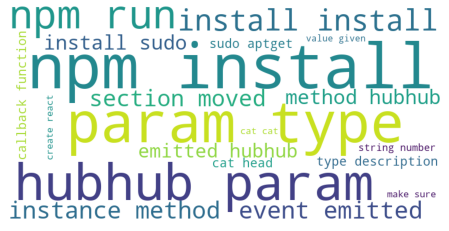

In [50]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_js_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

## Other:

In [22]:
other_df = train[train.language_group == 'Other']

In [23]:
other_text = ''
for i in range(other_df.shape[0]):
    other_text = other_text + other_df.cleaned.iloc[i]
    
other_text[0:200]

'army penknife amazon list bucket get download cat cat grep search key containing sync synchronise local local delete create delete supereasy need install anything selfcontained binary github release p'

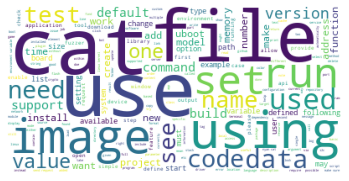

In [36]:
img = WordCloud(background_color='white').generate(other_text)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off');

In [25]:
other_bigrams = nltk.ngrams(other_text.split(), 2)
list(other_bigrams)

[('army', 'penknife'),
 ('penknife', 'amazon'),
 ('amazon', 'list'),
 ('list', 'bucket'),
 ('bucket', 'get'),
 ('get', 'download'),
 ('download', 'cat'),
 ('cat', 'cat'),
 ('cat', 'grep'),
 ('grep', 'search'),
 ('search', 'key'),
 ('key', 'containing'),
 ('containing', 'sync'),
 ('sync', 'synchronise'),
 ('synchronise', 'local'),
 ('local', 'local'),
 ('local', 'delete'),
 ('delete', 'create'),
 ('create', 'delete'),
 ('delete', 'supereasy'),
 ('supereasy', 'need'),
 ('need', 'install'),
 ('install', 'anything'),
 ('anything', 'selfcontained'),
 ('selfcontained', 'binary'),
 ('binary', 'github'),
 ('github', 'release'),
 ('release', 'page'),
 ('page', 'build'),
 ('build', 'linux'),
 ('linux', 'mac'),
 ('mac', 'window'),
 ('window', '32bit'),
 ('32bit', 'make'),
 ('make', 'download'),
 ('download', 's3myplatform'),
 ('s3myplatform', 'chmod'),
 ('chmod', 'ready'),
 ('ready', 'instead'),
 ('instead', 'build'),
 ('build', 'source'),
 ('source', 'need'),
 ('need', 'get'),
 ('get', 'environm

In [39]:
top_20_other_bigrams = (pd.Series(nltk.ngrams(other_text.split(), 2))
                      .value_counts()
                      .head(20))

top_20_other_bigrams.head()

(128, 128)         44
(send, request)    39
(make, sure)       37
(linux, kernel)    36
(nyan, cat)        35
dtype: int64

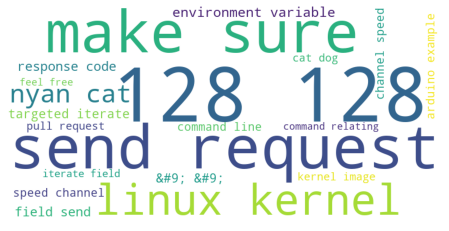

In [46]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_other_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [27]:
weird_words = []

for i in other_text.split():
    if len(i) < 3:
        weird_words.append(i)

In [28]:
weird_words

[]

In [ ]:
shared_word_list = ['cat', 'use', 'image', 'using', 'file', 'run']